In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.regression.linear_model as sm

# Exercise 1

In [2]:
raw_data = pd.read_csv('MROZ.txt', delim_whitespace=True, header=None)

In [3]:
# Variable wage = column 6
data = raw_data.loc[raw_data[6] != '.']
data = data.astype({6:'float'})
data = data.loc[data[6] > 0]
data[6]

0      3.3540
1      1.3889
2      4.5455
3      1.0965
4      4.5918
        ...  
423    2.3118
424    5.3061
425    5.8675
426    3.4091
427    4.0816
Name: 6, Length: 428, dtype: float64

# Exercise 2

In [4]:
# Wage = Column 6
# Age = Column 4
# Education = Column 5

### All women

In [5]:
# Wage
data[6].describe()

count    428.000000
mean       4.177682
std        3.310282
min        0.128200
25%        2.262600
50%        3.481900
75%        4.970750
max       25.000000
Name: 6, dtype: float64

In [6]:
# Age
data[4].describe()

count    428.000000
mean      41.971963
std        7.721084
min       30.000000
25%       35.000000
50%       42.000000
75%       47.250000
max       60.000000
Name: 4, dtype: float64

In [7]:
# Education
data[5].describe()

count    428.000000
mean      12.658879
std        2.285376
min        5.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       17.000000
Name: 5, dtype: float64

### Women whose husband has a higher wage than the median

In [13]:
# Men wages = Column 11
husb_higher_med = data.loc[data[5] > data[5].median()]
husb_higher_med[]

In [14]:
# Wage
husb_higher_med[6].describe()

count    144.000000
mean       5.349451
std        3.547190
min        0.170900
25%        2.960850
50%        4.660750
75%        7.035675
max       22.500000
Name: 6, dtype: float64

In [15]:
# Age
husb_higher_med[4].describe()

count    144.000000
mean      41.930556
std        8.060655
min       30.000000
25%       35.000000
50%       42.500000
75%       47.000000
max       60.000000
Name: 4, dtype: float64

In [16]:
# Education
husb_higher_med[5].describe()

count    144.000000
mean      15.208333
std        1.518534
min       13.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: 5, dtype: float64

### Women whose husband has a lower wage than the median

In [18]:
# Men wages = Column 11
husb_lower_med = data.loc[data[5] < data[5].median()]
husb_lower_med

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
11,1,1960,0,1,42,11,4.5918,4.58,2375,47,...,28700,0.6215,14,7,5.0,0,14,19.70007,1.524272,196
14,1,1848,0,1,43,10,3.6797,3.38,2024,45,...,31431,0.5815,7,7,7.5,1,6,24.63091,1.302831,36
15,1,1224,0,3,35,11,1.3472,0.00,1694,38,...,19180,0.7215,16,10,7.5,1,9,17.53103,.2980284,81
30,1,1040,0,0,50,11,1.5385,0.00,1840,53,...,6719,0.7515,7,7,7.5,1,32,5.11896,.4308079,1024
35,1,690,0,1,42,11,2.4638,0.00,1896,44,...,15897,0.7515,10,3,7.5,0,0,14.19698,.9017048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1,800,0,1,48,8,3.8250,2.30,2000,52,...,62060,0.7515,7,7,7.5,0,2,59.00000,1.341558,4
409,1,778,0,0,47,8,3.2134,7.25,2058,51,...,31810,0.6915,12,12,5.0,1,11,29.30997,1.16733,121
417,1,1350,0,4,37,8,1.7407,2.10,2400,41,...,15100,0.7515,7,7,3.0,0,4,12.75006,.5542873,16
419,1,1984,1,3,36,11,4.4859,3.26,1656,38,...,19600,0.7215,7,3,14.0,0,10,10.69998,1.500939,100


In [22]:
# Wage
husb_lower_med[6].describe()

count    72.000000
mean      2.945771
std       2.340912
min       0.128200
25%       1.768525
50%       2.456100
75%       3.671450
max      18.267000
Name: 6, dtype: float64

In [23]:
# Age
husb_lower_med[4].describe()

count    72.000000
mean     42.847222
std       7.648363
min      30.000000
25%      36.000000
50%      42.500000
75%      48.250000
max      59.000000
Name: 4, dtype: float64

In [24]:
# Education
husb_lower_med[5].describe()

count    72.000000
mean      9.500000
std       1.472757
min       5.000000
25%       8.750000
50%      10.000000
75%      11.000000
max      11.000000
Name: 5, dtype: float64

# Exercise 3

array([[<AxesSubplot:title={'center':'6'}>]], dtype=object)

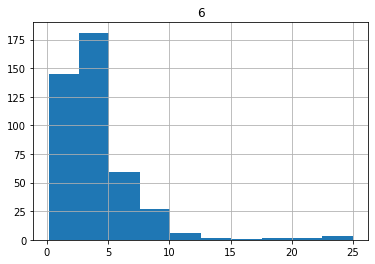

In [25]:
data.hist(6)

<Figure size 432x288 with 0 Axes>

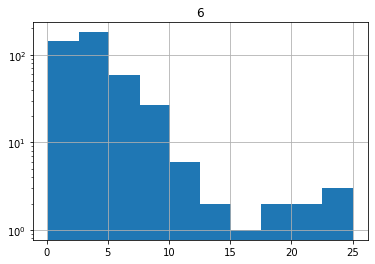

In [27]:
plt.figure()
hist = data.hist(6)
plt.yscale('log')

Both results represent the same information. However, it is easier to appreciate the biggest differences involving high values using the non-log one, while the smallesy ones in lower values is more interpretable in the log graphic.

# Exercise 4 REVISAR

In [31]:
# motheduc = Column 14
# fatheduc = Column 15

r = np.corrcoef(data[14], data[15])
print(r)

[[1.         0.55406322]
 [0.55406322 1.        ]]


In [40]:
educBoth = data.loc[:,14:15]
r = np.corrcoef(educBoth[14], educBoth[15])
print(r)

[[1.         0.55406322]
 [0.55406322 1.        ]]


Using correlation data, there exists a relation between both father and mother level of education. Taking into account that the value is 0.55406322, which is positive, it is likely that the higher the value of one of the elements, the higher the value of the other.

In [34]:
np.matmul(r.T,r)

array([[1.30698605, 1.10812644],
       [1.10812644, 1.30698605]])

In [93]:
vif= pd.DataFrame()
# data['const']=1
# vif['variables']=data.columns
# vif["VIF"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
# print(vif)

# Exercise 5 REVISAR

<AxesSubplot:xlabel='5', ylabel='6'>

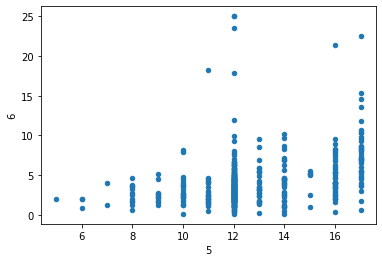

In [79]:
#wage et educ
data.plot.scatter(x=5,y=6)

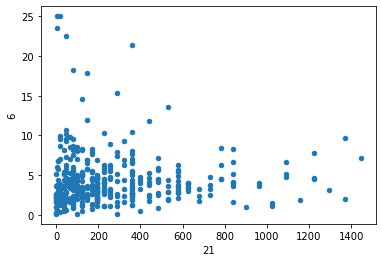

In [80]:
#wage et exper
scat=data.plot.scatter(x=21,y=6)

<AxesSubplot:xlabel='15', ylabel='6'>

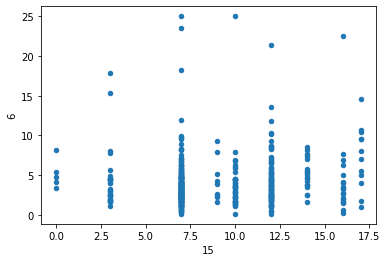

In [81]:
#wage et fatheduc
data.plot.scatter(x=15,y=6)

Although we can see different distributions, it is difficult to obtain conclusions using only the scatter plots because points may be overlapping. However, the wage is differently distributed looking at the evident differences of the graphics.

# Exercise 6

We have estimators which are not biased when the residuals of the models are independent of the variables of explanation.

The omitted variable biased happens when we ignore a variable of explanation in the equation and it is correlated with both the error and the studied variable

# Exercise 7

In [106]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X = data.iloc[:, [17,5,18,19,2,3]]
y = data[6]
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      6   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.654
Method:                 Least Squares   F-statistic:                              135.9
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                    2.72e-95
Time:                        15:02:49   Log-Likelihood:                         -1093.2
No. Observations:                 428   AIC:                                      2198.
Df Residuals:                     422   BIC:                                      2223.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(array([ 30., 215., 141.,  27.,   5.,   3.,   0.,   3.,   1.,   3.]),
 array([-5.56487079, -2.89615689, -0.227443  ,  2.44127089,  5.10998479,
         7.77869868, 10.44741257, 13.11612647, 15.78484036, 18.45355426,
        21.12226815]),
 <BarContainer object of 10 artists>)

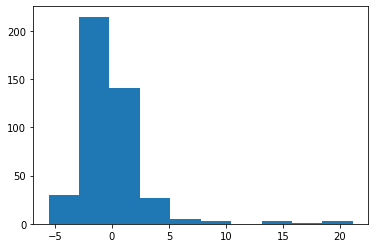

In [98]:
plt.hist(residuals)

# Comment

# Exercise 8

In [149]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X = data.iloc[:, [17,5,18,19,2,3]]
X['const']=1
y = np.log(data[6])
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           2.00e-13
Time:                        17:00:52   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
17             0.0353      0.070      0.503      0.6

/tmp/ipykernel_8977/1241353530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const']=1


In [151]:
coef=results.params.to_numpy()

(array([  4.,   3.,   5.,  19.,  63., 158., 141.,  25.,   5.,   5.]),
 array([-3.00985118, -2.48171228, -1.95357337, -1.42543447, -0.89729556,
        -0.36915666,  0.15898225,  0.68712115,  1.21526005,  1.74339896,
         2.27153786]),
 <BarContainer object of 10 artists>)

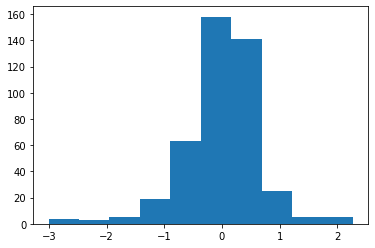

In [152]:
plt.hist(residuals)

# COMMENT

# Exercise 9

In [153]:
from scipy.stats import t

In [154]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X = data.iloc[:, [17,5,18,19,2,3]]
X['const'] = 1
y = np.log(data[6])

/tmp/ipykernel_8977/4252171413.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1


In [155]:
mat_X = X.to_numpy()
mat_y = y.to_numpy()
u = mat_y - mat_X@coef
n,k=np.shape(mat_X)
sig22=u.T@u/(n-k)
Var2=sig22*np.linalg.inv(mat_X.T @ mat_X)
std2=np.sqrt(np.diag(Var2))
std2

array([0.07017832, 0.01510178, 0.004487  , 0.00333073, 0.08530773,
       0.02694439, 0.20705047])

In [156]:
# 1%
print(t.ppf(1-0.005,mat_X.shape[0]-mat_X.shape[1]-2))
t0=(coef[3]-0)/std2[3]
print(t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2)
print(t0)

2.587613795882378
0.14341147344403282
1.4659517416241625


In [157]:
# 5%
print(t.ppf(1-0.025,mat_X.shape[0]-mat_X.shape[1]-2))
t0=(coef[3]-0)/std2[3]
print(t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2)
print(t0)

1.9656418415415788
0.14341147344403282
1.4659517416241625


In [158]:
# 10%
print(t.ppf(1-0.05,mat_X.shape[0]-mat_X.shape[1]-2))
t0=(coef[3]-0)/std2[3]
print(t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2)
print(t0)

1.6484984103848834
0.14341147344403282
1.4659517416241625


# Exercise 10

In [159]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X = data.iloc[:, [17,5,18,19,2,3]]
X['const'] = 1
y = np.log(data[6])

/tmp/ipykernel_8977/4252171413.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1


In [160]:
mat_X = X.to_numpy()
mat_y = y.to_numpy()
u = mat_y - mat_X@coef
n,k=np.shape(mat_X)
sig22=u.T@u/(n-k)
Var2=sig22*np.linalg.inv(mat_X.T @ mat_X)
std2=np.sqrt(np.diag(Var2))
std2

array([0.07017832, 0.01510178, 0.004487  , 0.00333073, 0.08530773,
       0.02694439, 0.20705047])

In [161]:
# 5%
print(t.ppf(1-0.025,mat_X.shape[0]-mat_X.shape[1]-2))
t0=(coef[3]-0.01)/std2[3]
print(t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2)
print(t0)

1.9656418415415788
1.8748021807993243
-1.5363887846744926


# Exercise 11